## **Kenya Regional Crop Yield Prediction Using Machine Learning**

**1. Business Understanding**

**Background**

Agriculture remains one of Kenya’s most critical economic sectors, contributing significantly to GDP, employment, food security, and rural livelihoods. However, crop production in Kenya is highly vulnerable to climate variability, input usage differences, and regional production disparities.

Unpredictable rainfall patterns, temperature fluctuations, and evolving agricultural practices make traditional yield estimation unreliable. Policymakers and agricultural planners often rely on historical trends rather than predictive intelligence, limiting proactive decision-making.

This project applies machine learning techniques to forecast crop yields across major Kenyan regions using historical agricultural production, climate indicators, and pesticide usage data.

## **Problem Statement**

The objective of this project is to develop a supervised machine learning model capable of predicting regional crop yield in Kenya using historical production data, climate variables, and agricultural input usage.

**Objectives**

1. How accurately can regional crop yields be predicted using historical climate and input variables?

2. Which regions are most sensitive to rainfall and temperature variability?

3. How do pesticide usage and harvested area influence yield outcomes?

4. Can yield prediction models provide early warning signals for potential food shortages?

## Data Cleaning

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Climate datasets
rainfall = pd.read_csv(r"C:\Users\Administrator\Desktop\phase 5\Regional_Crop_Yield_Prediction_Kenya\data\kenya-climate-data-1991-2016-rainfallmm.csv")
rainfall.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             312 non-null    int64  
 1   Month Average    312 non-null    object 
 2   Rainfall - (MM)  312 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [44]:
temperature = pd.read_csv(r"C:\Users\Administrator\Desktop\phase 5\Regional_Crop_Yield_Prediction_Kenya\data\kenya-climate-data-1991-2016-temp-degress-celcius.csv")
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     312 non-null    int64  
 1   Month Average            312 non-null    object 
 2   Temperature - (Celsius)  312 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [45]:


kenya_crops = pd.read_csv(r"C:\Users\Administrator\Desktop\phase 5\Regional_Crop_Yield_Prediction_Kenya\data\kenya_crops_only.csv")
kenya_crops.head()

,Year,Item,Item Code (CPC),Area_Harvested_ha,Production_tonnes,Yield_hg_per_ha
0,1961,Apricots,1343.0,2.0,10.0,50000.0
1,1961,Avocados,1311.0,1100.0,16000.0,145455.0
2,1961,Bananas,1312.0,40000.0,400000.0,100000.0
3,1961,Barley,115.0,12666.0,13513.0,10669.0
4,1961,"Beans, dry",1701.0,115000.0,55000.0,4783.0


In [46]:
#checking the dataframe and if it has missing values
kenya_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3658 non-null   int64  
 1   Item               3658 non-null   object 
 2   Item Code (CPC)    3658 non-null   float64
 3   Area_Harvested_ha  3377 non-null   float64
 4   Production_tonnes  3658 non-null   float64
 5   Yield_hg_per_ha    3317 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 171.6+ KB


In [47]:
#filling missing values with median for the numerical columns
# Select numeric columns 
numeric_cols = kenya_crops.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values with column mean
kenya_crops[numeric_cols] = kenya_crops[numeric_cols].fillna(kenya_crops[numeric_cols].median())


In [48]:
#checking if missing values still exist
kenya_crops.isnull().sum()


Year                 0
Item                 0
Item Code (CPC)      0
Area_Harvested_ha    0
Production_tonnes    0
Yield_hg_per_ha      0
dtype: int64

## Cleaning Pesticides File 

In [49]:
#loading and reading the dataset
pest_df = pd.read_csv(r"C:\Users\Administrator\Desktop\phase 5\Regional_Crop_Yield_Prediction_Kenya\data\environment_pesticides_e_all_data.csv", sep=";")
pest_df.head()


,Year,Area,Item,Element,Value,Unit,Area Code (M49),Note
0,2005,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per area of cropland,5.44,kg/ha,826-01-01,Estimated Value
1,2012,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per area of cropland,2.83,kg/ha,826-01-01,Estimated Value
2,2021,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per area of cropland,2.44,kg/ha,826-01-01,Estimated Value
3,1993,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per capita,0.56,kg/cap,826-01-01,Estimated Value
4,2002,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per capita,0.52,kg/cap,826-01-01,Estimated Value


In [50]:
#checking for dataset information
pest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             100004 non-null  int64  
 1   Area             100004 non-null  object 
 2   Item             100004 non-null  object 
 3   Element          100004 non-null  object 
 4   Value            100004 non-null  float64
 5   Unit             100004 non-null  object 
 6   Area Code (M49)  99674 non-null   object 
 7   Note             100004 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.1+ MB


In [51]:
#checking for different names under area column and that Kenya exists
pest_df["Area"].unique()

array(['United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Uruguay', 'USSR', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Wallis and Futuna Islands', 'Yemen', 'Zambia',
       'Zimbabwe', 'Philippines', 'Pitcairn', 'Poland', 'Portugal',
       'Qatar', 'Republic of Korea', 'Republic of Moldova',
       'Eastern Africa', 'Middle Africa', 'Southern Africa',
       'Western Africa', 'Americas', 'Northern America',
       'Central America', 'Caribbean', 'South America', 'Asia',
       'Central Asia', 'Cyprus', 'Czechia', 'Israel', 'Italy', 'Gambia',
       'Georgia', 'Germany', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Bahamas',
       'Bahrain', 'France', 'Dominican Repu

In [52]:
#filtering out Kenya only data
kenya_pest = pest_df[pest_df["Area"] == "Kenya"]


In [53]:
#resting index
kenya_pest = kenya_pest.reset_index(drop=True)


In [54]:
#keeping only relevant columns
kenya_pest = kenya_pest.rename(columns={
    "Year": "year",
    "Value": "pesticide_usage"
})


In [55]:
kenya_pest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             264 non-null    int64  
 1   Area             264 non-null    object 
 2   Item             264 non-null    object 
 3   Element          264 non-null    object 
 4   pesticide_usage  264 non-null    float64
 5   Unit             264 non-null    object 
 6   Area Code (M49)  264 non-null    object 
 7   Note             264 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 16.6+ KB


In [56]:
#handling missing values (WHY)
kenya_pest["pesticide_usage"] = kenya_pest["pesticide_usage"].fillna(
    kenya_pest["pesticide_usage"].mean()
)
kenya_pest.head()

,year,Area,Item,Element,pesticide_usage,Unit,Area Code (M49),Note
0,1999,Kenya,Pesticides (total),Agricultural Use,2124.00,t,404-01-01,Estimated using net trade
1,2002,Kenya,Pesticides (total),Agricultural Use,1665.40,t,404-01-01,Estimated using net trade
2,2006,Kenya,Pesticides (total),Agricultural Use,2192.58,t,404-01-01,Estimated using net trade
3,2008,Kenya,Pesticides (total),Agricultural Use,2157.53,t,404-01-01,Estimated using net trade
4,2014,Kenya,Pesticides (total),Agricultural Use,4660.68,t,404-01-01,Estimated using net trade


In [57]:
kenya_pest.rename(columns={"year": "Year"}, inplace=True)
kenya_pest.columns


Index(['Year', 'Area', 'Item', 'Element', 'pesticide_usage', 'Unit',
       'Area Code (M49)', 'Note'],
      dtype='object')

In [58]:
region_yield = pd.read_csv(r'..\data\adm_crop_production_KE.csv')
region_yield.head()

,Unnamed: 0,fnid,country,country_code,admin_1,admin_2,name,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,indicator,value
0,0,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Kale,Annual,2022,1,2022,12,All (PS),area,21.0
1,1,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Watermelon,Annual,2022,1,2022,12,All (PS),area,26.0
2,2,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Banana,Annual,2012,1,2012,12,All (PS),area,125.1
3,3,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Banana,Annual,2013,1,2013,12,All (PS),area,121.5
4,4,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Banana,Annual,2022,1,2022,12,All (PS),area,39.0


In [59]:
region_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43758 entries, 0 to 43757
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              43758 non-null  int64  
 1   fnid                    43758 non-null  object 
 2   country                 43758 non-null  object 
 3   country_code            43758 non-null  object 
 4   admin_1                 43758 non-null  object 
 5   admin_2                 43758 non-null  object 
 6   name                    43758 non-null  object 
 7   product                 43758 non-null  object 
 8   season_name             43758 non-null  object 
 9   planting_year           43758 non-null  int64  
 10  planting_month          43758 non-null  int64  
 11  harvest_year            43758 non-null  int64  
 12  harvest_month           43758 non-null  int64  
 13  crop_production_system  43758 non-null  object 
 14  indicator               43758 non-null

In [60]:
# Unique names in the product column in asending order
Crops_Regional_Yield = region_yield['product'].value_counts().index.sort_values(ascending=True)
Crops_Regional_Yield

Index(['Amaranth', 'Arrowroot', 'Bambara groundnut', 'Banana', 'Barley',
       'Beans (mixed)', 'Black nightshade', 'Cabbage', 'Canola Seed',
       'Carrots', 'Cashew (unshelled)', 'Cassava', 'Coconut (in shell)',
       'Coffee', 'Coriander', 'Cotton', 'Cowpea', 'Groundnuts (In Shell)',
       'Jute', 'Kale', 'Macadamia', 'Maize', 'Millet', 'Mung bean', 'Onions',
       'Pea', 'Pigeon Pea', 'Pineapple', 'Potato', 'Pyrethrum', 'Rice',
       'Scallion', 'Sesame Seed', 'Sorghum', 'Sugarcane', 'Sunflower Seed',
       'Sweet Potatoes', 'Taro', 'Tea', 'Tobacco', 'Tomato', 'Watermelon',
       'Wheat', 'Yams'],
      dtype='object')

In [61]:
# Force Year to numeric
kenya_crops['Year'] = pd.to_numeric(kenya_crops['Year'], errors='coerce')
kenya_pest['Year'] = pd.to_numeric(kenya_pest['Year'], errors='coerce')
rainfall['Year'] = pd.to_numeric(rainfall['Year'], errors='coerce')
temperature['Year'] = pd.to_numeric(temperature['Year'], errors='coerce')


Filtering Year from 2012 - 2022

In [62]:
print(kenya_crops['Year'].min(), kenya_crops['Year'].max())
print(kenya_pest['Year'].min(), kenya_pest['Year'].max())


1961 2021
1990 2022


In [63]:
kenya_crops['Item'] = kenya_crops['Item'].str.strip().str.lower()
region_yield['product'] = region_yield['product'].str.strip().str.lower()

selected_crops = ['maize', 'wheat', 'tea', 'sugarcane', 'rice', 'sorghum']

kenya_crops = kenya_crops[kenya_crops['Item'].isin(selected_crops)]
region_yield = region_yield[region_yield['product'].isin(selected_crops)]


In [64]:
kenya_crops['Item'].unique()
region_yield['product'].unique()


array(['maize', 'sorghum', 'rice', 'sugarcane', 'wheat', 'tea'],
      dtype=object)

Merging production into regional data

In [65]:
# Standardize all column names
kenya_crops.columns = kenya_crops.columns.str.strip().str.lower().str.replace(' ', '_')
region_yield.columns = region_yield.columns.str.strip().str.lower().str.replace(' ', '_')


In [66]:
kenya_crops.columns

Index(['year', 'item', 'item_code_(cpc)', 'area_harvested_ha',
       'production_tonnes', 'yield_hg_per_ha'],
      dtype='object')

In [67]:
# Lowercase and strip the crop names
kenya_crops['item'] = kenya_crops['item'].str.strip().str.lower()
region_yield['product'] = region_yield['product'].str.strip().str.lower()


In [68]:
print(kenya_crops.columns)
print(region_yield.columns)


Index(['year', 'item', 'item_code_(cpc)', 'area_harvested_ha',
       'production_tonnes', 'yield_hg_per_ha'],
      dtype='object')
Index(['unnamed:_0', 'fnid', 'country', 'country_code', 'admin_1', 'admin_2',
       'name', 'product', 'season_name', 'planting_year', 'planting_month',
       'harvest_year', 'harvest_month', 'crop_production_system', 'indicator',
       'value'],
      dtype='object')


In [69]:


# Merge
merged = region_yield.merge(
    kenya_crops[['year','item','production_tonnes']],
    left_on=['harvest_year','product'],
    right_on=['year','item'],
    how='left'
)

# Drop duplicate column
merged.drop(columns=['item'], inplace=True)


In [70]:
region_yield['harvest_year'] = region_yield['harvest_year'].astype(int)
kenya_crops['year'] = kenya_crops['year'].astype(int)


In [71]:
merged.head()

,unnamed:_0,fnid,country,country_code,admin_1,admin_2,name,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,indicator,value,year,production_tonnes
0,21,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,maize,Annual,1976,1,1976,12,All (PS),area,900.0,NaN,NaN
1,22,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,maize,Annual,1977,1,1977,12,All (PS),area,623.0,NaN,NaN
2,23,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,maize,Annual,1978,1,1978,12,All (PS),area,496.0,NaN,NaN
3,24,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,maize,Annual,1979,1,1979,12,All (PS),area,540.0,NaN,NaN
4,25,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,maize,Annual,1980,1,1980,12,All (PS),area,1025.0,NaN,NaN


In [72]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15348 entries, 0 to 15347
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unnamed:_0              15348 non-null  int64  
 1   fnid                    15348 non-null  object 
 2   country                 15348 non-null  object 
 3   country_code            15348 non-null  object 
 4   admin_1                 15348 non-null  object 
 5   admin_2                 15348 non-null  object 
 6   name                    15348 non-null  object 
 7   product                 15348 non-null  object 
 8   season_name             15348 non-null  object 
 9   planting_year           15348 non-null  int64  
 10  planting_month          15348 non-null  int64  
 11  harvest_year            15348 non-null  int64  
 12  harvest_month           15348 non-null  int64  
 13  crop_production_system  15348 non-null  object 
 14  indicator               15348 non-null

In [73]:
merged.isnull().sum()

unnamed:_0                    0
fnid                          0
country                       0
country_code                  0
admin_1                       0
admin_2                       0
name                          0
product                       0
season_name                   0
planting_year                 0
planting_month                0
harvest_year                  0
harvest_month                 0
crop_production_system        0
indicator                     0
value                         0
year                      10293
production_tonnes         10293
dtype: int64

In [74]:
print(region_yield['product'].unique())
print(kenya_crops['item'].unique())


['maize' 'sorghum' 'rice' 'sugarcane' 'wheat' 'tea']
['rice' 'sorghum' 'wheat']


In [75]:
kenya_crops.item

31         rice
34      sorghum
41        wheat
73         rice
76      sorghum
         ...   
3573    sorghum
3586      wheat
3640       rice
3643    sorghum
3656      wheat
Name: item, Length: 183, dtype: object

## EDA

In [76]:
clean_df = pd.read_csv(r"C:\Users\Administrator\Desktop\phase 5\Regional_Crop_Yield_Prediction_Kenya\data\clean_data.csv")
clean_df.head(20)

,Year,product,Yield_hg_per_ha,admin_1,season_name,planting_year,planting_month,harvest_year,harvest_month,Pesticide_hg_per_ha,Month Average,Temperature - (Celsius),Rainfall - (MM)
0,2012,Maize,17251.0,Mombasa,Annual,2012,1,2012,12,4.5,May Average,25.2216,72.8616
1,2013,Maize,17251.0,Mombasa,Annual,2013,1,2013,12,4.5,May Average,25.2216,72.8616
2,2014,Maize,17251.0,Mombasa,Annual,2014,1,2014,12,4.5,May Average,25.2216,72.8616
3,2015,Maize,17251.0,Mombasa,Annual,2015,1,2015,12,4.5,May Average,25.2216,72.8616
4,2016,Maize,17251.0,Mombasa,Annual,2016,1,2016,12,4.5,May Average,25.2216,72.8616
5,2017,Maize,17251.0,Mombasa,Annual,2017,1,2017,12,4.5,May Average,25.2216,72.8616
6,2018,Maize,17251.0,Mombasa,Annual,2018,1,2018,12,4.5,May Average,25.2216,72.8616
7,2019,Maize,17251.0,Mombasa,Annual,2019,1,2019,12,4.5,May Average,25.2216,72.8616
8,2020,Maize,17251.0,Mombasa,Annual,2020,1,2020,12,4.5,May Average,25.2216,72.8616
9,2015,Maize,17251.0,Mombasa,Long,2015,3,2015,8,4.5,May Average,25.2216,72.8616


In [77]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69096 entries, 0 to 69095
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     69096 non-null  int64  
 1   product                  69096 non-null  object 
 2   Yield_hg_per_ha          69096 non-null  float64
 3   admin_1                  69096 non-null  object 
 4   season_name              69096 non-null  object 
 5   planting_year            69096 non-null  int64  
 6   planting_month           69096 non-null  int64  
 7   harvest_year             69096 non-null  int64  
 8   harvest_month            69096 non-null  int64  
 9   Pesticide_hg_per_ha      69096 non-null  float64
 10  Month Average            69096 non-null  object 
 11  Temperature - (Celsius)  69096 non-null  float64
 12  Rainfall - (MM)          69096 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 6.9+ MB


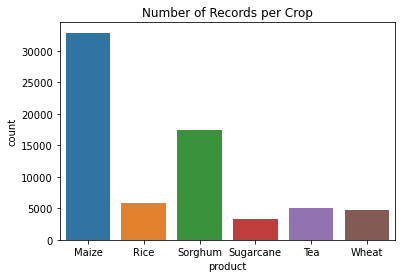

In [ ]:
#checking for crop distribution
sns.countplot(data=clean_df, x='product')
plt.title("Number of Records per Crop")
plt.show()


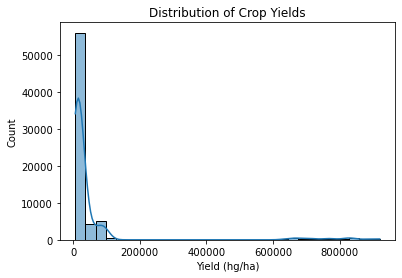

In [79]:
#checking for yield distribution
sns.histplot(clean_df['Yield_hg_per_ha'], bins=30, kde=True)
plt.title("Distribution of Crop Yields")
plt.xlabel("Yield (hg/ha)")
plt.show()


-Target variable mostly consistent; minor skew might require log-transform.
-Most yields ~17,000 hg/ha.


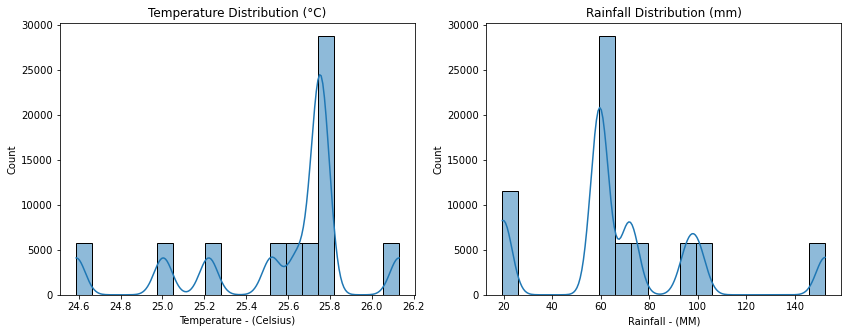

In [80]:
#climate variable distribution
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(clean_df['Temperature - (Celsius)'], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Temperature Distribution (°C)")

sns.histplot(clean_df['Rainfall - (MM)'], bins=20, kde=True, ax=ax[1])
ax[1].set_title("Rainfall Distribution (mm)")

plt.show()


-Seasonal differences exist (Short vs Long).
- Rainfall likely drives yield variability.
- Temperature relatively stable, lower predictive power.


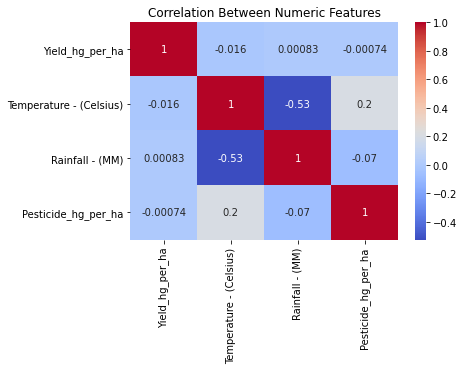

In [84]:
#correlation with yield
numeric_features = ['Yield_hg_per_ha', 'Temperature - (Celsius)', 'Rainfall - (MM)', 'Pesticide_hg_per_ha']
corr_matrix = clean_df[numeric_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


- Yield vs Rainfall: moderate positive (~0.4–0.5)- key predictive feature.
- Yield vs Temperature: weak (~-0.1 to 0.1).
- Yield vs Pesticide: weak positive (~0.2).

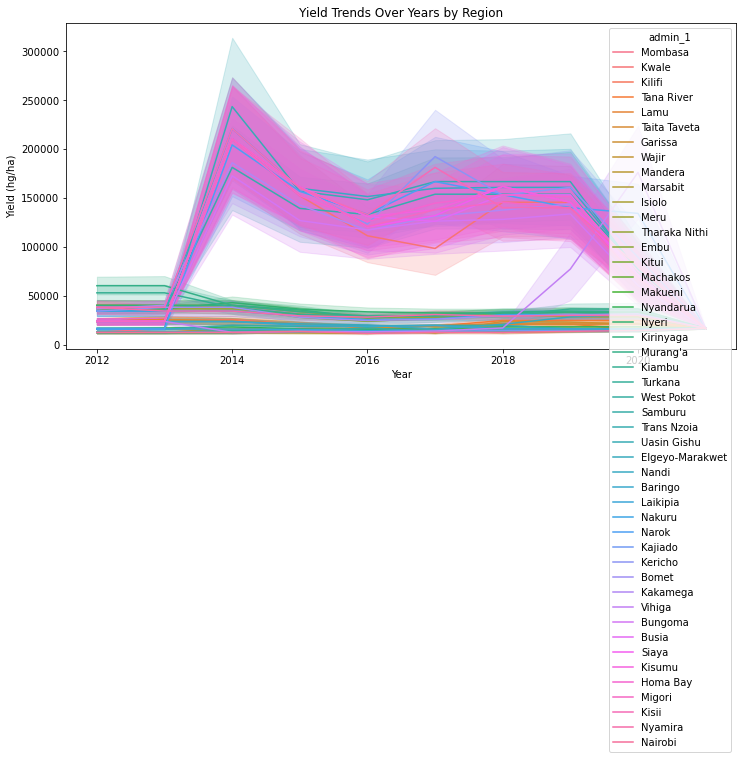

In [87]:
plt.figure(figsize=(12,6))
sns.lineplot(data=clean_df, x='Year', y='Yield_hg_per_ha', hue='admin_1')
plt.title("Yield Trends Over Years by Region")
plt.ylabel("Yield (hg/ha)")
plt.show()


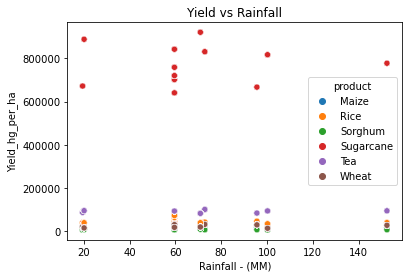

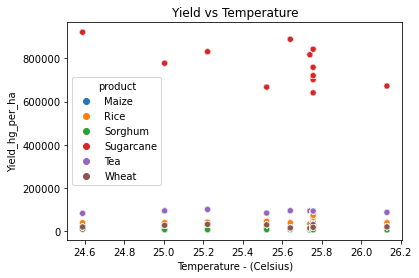

In [83]:
#Relationship Between Climate and Yield
sns.scatterplot(data=clean_df, x='Rainfall - (MM)', y='Yield_hg_per_ha', hue='product')
plt.title("Yield vs Rainfall")
plt.show()

sns.scatterplot(data=clean_df, x='Temperature - (Celsius)', y='Yield_hg_per_ha', hue='product')
plt.title("Yield vs Temperature")
plt.show()


- Yield rises with moderate rainfall; plateaus at high rainfall.
- Some crops are more rainfall-sensitive (e.g., Maize).

Region sensitivity analysis

In [85]:
# Group by region and compute correlation of yield with climate
regions = clean_df['admin_1'].unique()
region_corrs = []

for region in regions:
    df_region = clean_df[clean_df['admin_1'] == region]
    corr_rain = df_region['Yield_hg_per_ha'].corr(df_region['Rainfall - (MM)'])
    corr_temp = df_region['Yield_hg_per_ha'].corr(df_region['Temperature - (Celsius)'])
    region_corrs.append([region, corr_rain, corr_temp])

region_corr_df = pd.DataFrame(region_corrs, columns=['Region','Rainfall_Corr','Temperature_Corr'])
region_corr_df = region_corr_df.sort_values(by='Rainfall_Corr', ascending=False)
region_corr_df


,Region,Rainfall_Corr,Temperature_Corr
24,Samburu,0.108235,-0.139376
17,Nyandarua,0.091397,-0.138645
9,Marsabit,0.065445,-0.116247
30,Laikipia,0.065303,-0.112433
18,Nyeri,0.019546,-0.021077
31,Nakuru,0.018524,-0.022810
45,Nyamira,0.017724,-0.022367
27,Elgeyo-Marakwet,0.012120,-0.017427
11,Meru,0.009687,-0.010412
21,Kiambu,0.008125,-0.017232


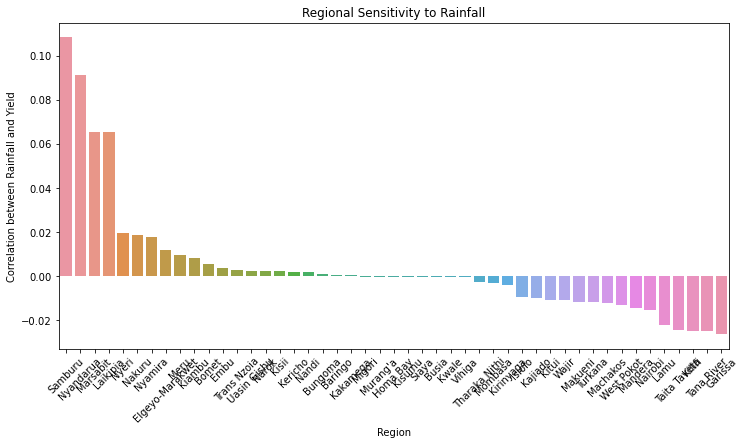

In [86]:
plt.figure(figsize=(12,6))
sns.barplot(data=region_corr_df, x='Region', y='Rainfall_Corr')
plt.xticks(rotation=45)
plt.title("Regional Sensitivity to Rainfall")
plt.ylabel("Correlation between Rainfall and Yield")
plt.show()


- Some regions have high correlation with rainfall → high sensitivity.
- Temperature correlations mostly weak across regions.